In [2]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\Dinesh\Documents\Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (1).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (10).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (100).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (101).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (102).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (103).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (104).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (105).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (106).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (107).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (108).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (109).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (11).jpg
C:\Users\Dinesh\Documents\Project\Benign cases\Bengin case (110).jpg
C:\Users\Dinesh\Documents\Project\Beni

In [3]:
# Importing all the necessary modules

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image

In [6]:
import PIL
import pathlib
import matplotlib.image as mpimg

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [8]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [9]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=15
CHANNELS=3

In [10]:
# Loading the dataset

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Dinesh\Documents\Project",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1097 files belonging to 3 classes.


In [12]:
class_names = dataset.class_names
class_names

['Benign cases', 'Malignant cases', 'Normal cases']

In [13]:
len(dataset)

18

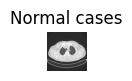

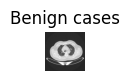

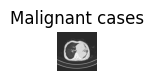

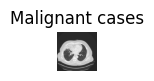

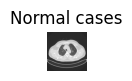

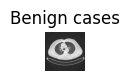

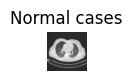

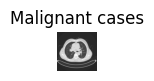

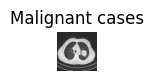

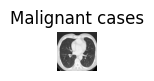

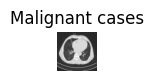

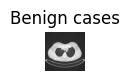

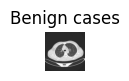

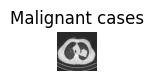

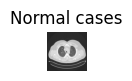

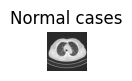

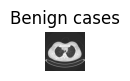

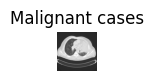

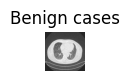

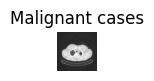

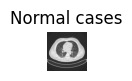

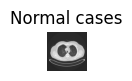

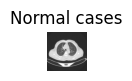

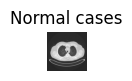

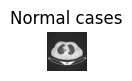

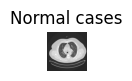

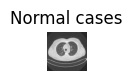

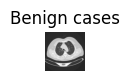

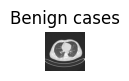

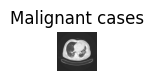

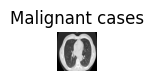

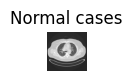

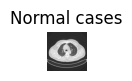

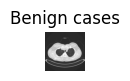

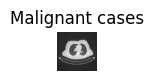

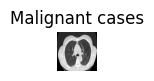

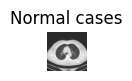

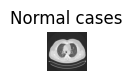

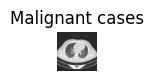

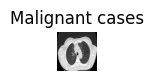

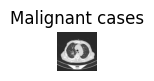

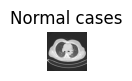

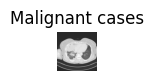

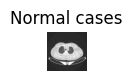

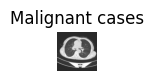

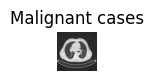

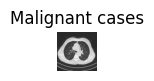

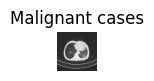

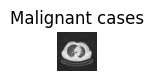

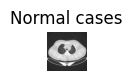

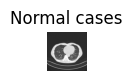

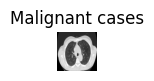

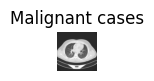

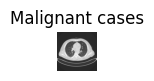

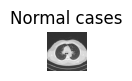

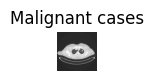

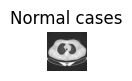

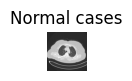

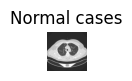

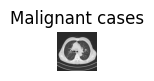

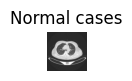

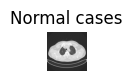

In [17]:
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        plt.show()

In [18]:
# Partitioning the data into test, train and validation

In [29]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds
    

In [30]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [31]:
# Preprocessing (Resizing and Rescaling) the Images using Tensorflow keras module

In [32]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [33]:
# Data augmentation using Tensorflow keras module (RandomRotation(0.2)Radians, It means approximately -11.5 to 11.5 degrees)

In [34]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [35]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [36]:
# Define the CNN Model

In [70]:
model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(16, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [71]:
# Compile the model

In [1]:
model.compile(
    optimizer='adam',
    loss=tf.compat.v1.losses.sparse_softmax_cross_entropy(from_logits=False),
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [73]:
# Display model Summary

In [74]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (62, 254, 254, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (62, 127, 127, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (62, 125, 125, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (62, 62, 62, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (62, 60, 60, 64)         

In [75]:
# Training the model

In [76]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/15
14/14 [==============================] - 28s 2s/step - loss: 1.0003 - accuracy: 0.4829 - val_loss: 0.8651 - val_accuracy: 0.5161
Epoch 2/15
14/14 [==============================] - 16s 1s/step - loss: 0.9569 - accuracy: 0.5677 - val_loss: 0.8850 - val_accuracy: 0.5161
Epoch 3/15
14/14 [==============================] - 16s 1s/step - loss: 0.9154 - accuracy: 0.5713 - val_loss: 0.7629 - val_accuracy: 0.5161
Epoch 4/15
14/14 [==============================] - 16s 1s/step - loss: 0.7774 - accuracy: 0.6572 - val_loss: 0.6026 - val_accuracy: 0.8065
Epoch 5/15
14/14 [==============================] - 16s 1s/step - loss: 0.6084 - accuracy: 0.7585 - val_loss: 0.4540 - val_accuracy: 0.8548
Epoch 6/15
14/14 [==============================] - 15s 1s/step - loss: 0.4742 - accuracy: 0.8269 - val_loss: 0.4178 - val_accuracy: 0.8548
Epoch 7/15
14/14 [==============================] - 16s 1s/step - loss: 0.3755 - accuracy: 0.8492 - val_loss: 0.2497 - val_accuracy: 0.9032
Epoch 8/15
14/14 [==

In [77]:
#Testing the model

In [78]:
model.evaluate(test_ds)

3/3 [==============================] - 2s 480ms/step - loss: 0.1065 - accuracy: 0.9785


[0.10652460902929306, 0.9784946441650391]

In [79]:
# Finding the accuracy

In [80]:
acc = history.history['accuracy']

In [81]:
acc

[0.4829210937023163,
 0.567726731300354,
 0.5712603330612183,
 0.6572437882423401,
 0.7585394382476807,
 0.8268551230430603,
 0.849234402179718,
 0.8892815113067627,
 0.9340400695800781,
 0.9446407556533813,
 0.9658421874046326,
 0.9776207208633423,
 0.9893993139266968,
 0.9964664578437805,
 0.9988221526145935]

In [82]:
# Finding the loss

In [83]:
loss = history.history['loss']

In [84]:
loss

[1.0003420114517212,
 0.9569190740585327,
 0.9154177308082581,
 0.7774369120597839,
 0.6083673238754272,
 0.4742416441440582,
 0.37554681301116943,
 0.3099968433380127,
 0.1754271388053894,
 0.18262851238250732,
 0.11233389377593994,
 0.07588391751050949,
 0.0384635403752327,
 0.018808448687195778,
 0.013683047145605087]

In [85]:
# Plot the accuracy figure

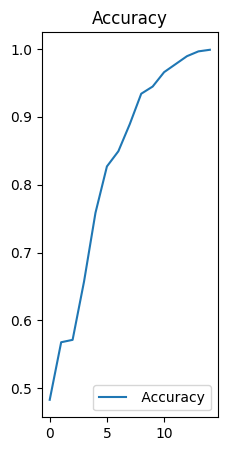

In [86]:
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.show()


In [87]:
# Plot the loss figure

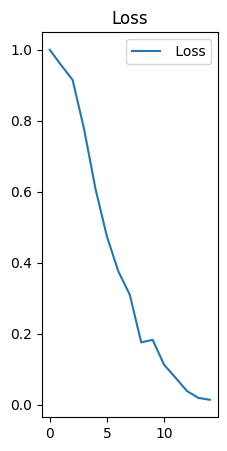

In [88]:
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [89]:
# Make predictions on a single image

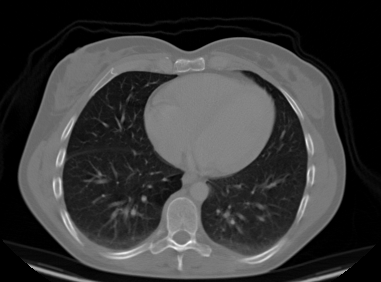

In [90]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = r"C:\Users\Dinesh\Downloads\test4.png"
image = load_img(image_path)
image_array =img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [91]:
# Predict the class of image

In [92]:
pred = model.predict(scaled_img)

1/1 [==============================] - 1s 544ms/step


In [93]:
output=model.predict(scaled_img)
output = class_names[np.argmax(pred)]
output

1/1 [==============================] - 0s 45ms/step


'Malignant cases'

In [94]:
import pickle
tensorflow_model=open('Lung_cancer_prediction.pkl','wb')
pickle.dump(model,tensorflow_model)
tensorflow_model.close()